In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler


In [38]:
data_train = pd.read_csv("train.csv")
data_train

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...,...
524159,524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


In [39]:
cor_target = data_train.corr(numeric_only=True)["BeatsPerMinute"]
cor_target

id                          -0.000355
RhythmScore                  0.005440
AudioLoudness               -0.003327
VocalContent                 0.004876
AcousticQuality             -0.000820
InstrumentalScore            0.001900
LivePerformanceLikelihood    0.003471
MoodScore                    0.007059
TrackDurationMs              0.006637
Energy                      -0.004375
BeatsPerMinute               1.000000
Name: BeatsPerMinute, dtype: float64

In [40]:
df_train, df_test = train_test_split(data_train, test_size=0.1)
df_test

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
329959,329959,0.355044,-12.605980,0.082880,0.000005,0.334890,0.290123,0.475023,291523.8588,0.441600,156.07473
339659,339659,0.606959,-6.231342,0.187045,0.173934,0.000001,0.215417,0.567309,301732.1688,0.410467,117.47294
332152,332152,0.481643,-10.411381,0.158711,0.349744,0.186057,0.024300,0.608876,226822.7230,0.752267,142.20322
166694,166694,0.722750,-9.315710,0.118568,0.069566,0.184469,0.306501,0.025600,288313.9438,0.844267,160.13828
229736,229736,0.539014,-1.357000,0.039242,0.162990,0.000001,0.357799,0.447596,337873.5119,0.670467,177.82299
...,...,...,...,...,...,...,...,...,...,...,...
280808,280808,0.784788,-9.895970,0.107617,0.313928,0.053339,0.240103,0.243627,348547.0102,0.091267,111.89849
475848,475848,0.692428,-12.886478,0.067765,0.394869,0.002930,0.100957,0.379929,178959.2572,0.496067,151.59580
519121,519121,0.562210,-10.798505,0.023500,0.000005,0.284874,0.233624,0.519913,240842.1256,0.619133,139.07509
368653,368653,0.975000,-12.571265,0.023500,0.046797,0.268087,0.035037,0.293968,157544.3561,0.836667,149.90415


In [41]:
X_train = df_train.drop(columns=["BeatsPerMinute", "id"])
y_train = df_train["BeatsPerMinute"]

X_test = df_test.drop(columns=["BeatsPerMinute", "id"])
y_test = df_test["BeatsPerMinute"]

RMSE : 26.60065927257914
R²  : 0.00014958858292501986


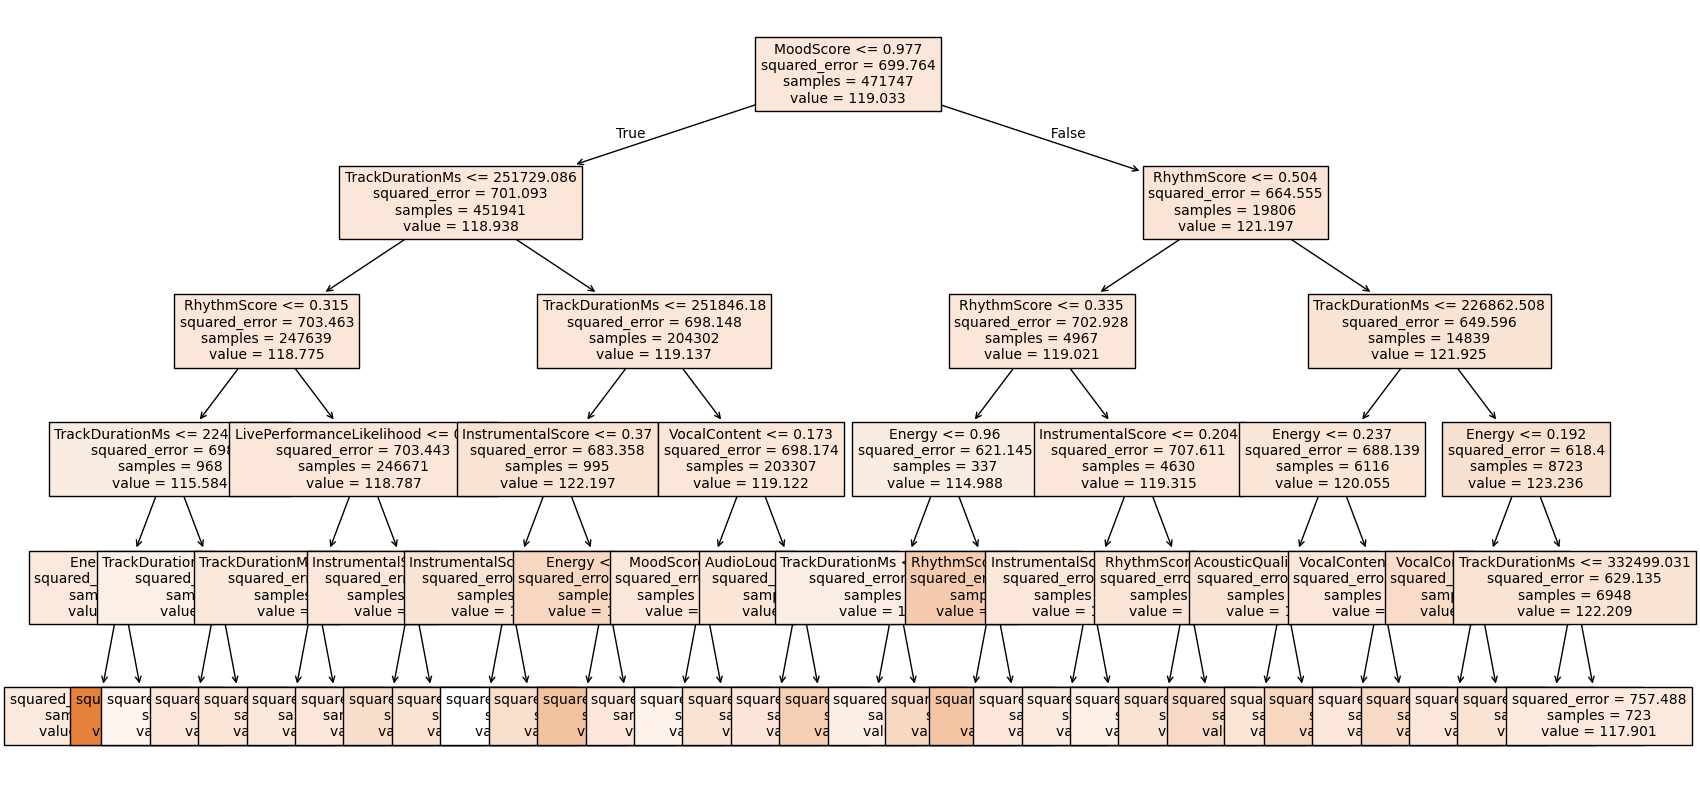

In [42]:
tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entraînement
tree.fit(X_train, y_train)

# Prédiction
y_pred = tree.predict(X_test)

# Évaluation
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("R²  :", r2)

# Visualisation de l’arbre
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("R²  :", r2)

RMSE : 26.59615230261548
R²  : 0.0004883707141251081


In [45]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("R²  :", r2)

RMSE : 26.599058577915127
R²  : 0.0002699169588700201


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

# Définition du modèle
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Grille d’hyperparamètres à tester
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# On utilise le MSE comme métrique (minimisation)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

# GridSearch avec validation croisée
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Entraînement
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score (MSE CV) :", -grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


MemoryError: Unable to allocate 2.88 MiB for an array with shape (377398,) and data type int64